In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
houses = pd.read_csv(r"C:\Training\Kaggle\Datasets\New Delhi Rental Listings\June_8_data_metro_closest_stations.csv",
                    index_col=0)
houses.head()

,size_sq_ft,propertyType,bedrooms,latitude,longitude,localityName,suburbName,cityName,price,companyName,closest_mtero_station_km,AP_dist_km,Aiims_dist_km,NDRLW_dist_km
0,400,Independent Floor,1,28.641010,77.284386,Swasthya Vihar,Delhi East,Delhi,9000,Dream Homez,0.577495,21.741188,11.119239,6.227231
1,1050,Apartment,2,28.594969,77.298668,mayur vihar phase 1,Delhi East,Delhi,20000,Rupak Properties Stock,0.417142,21.401856,9.419061,9.217502
2,2250,Independent Floor,2,28.641806,77.293922,Swasthya Vihar,Delhi East,Delhi,28000,Aashiyana Real Estate,0.125136,22.620365,11.829486,7.159184
3,1350,Independent Floor,2,28.644363,77.293228,Krishna Nagar,Delhi East,Delhi,28000,Shivam Real Estate,0.371709,22.681201,11.982708,7.097348
4,450,Apartment,2,28.594736,77.311150,New Ashok Nagar,Delhi East,Delhi,12500,Shree Properties,1.087760,22.592810,10.571573,10.263271


In [3]:
houses.columns

Index(['size_sq_ft', 'propertyType', 'bedrooms', 'latitude', 'longitude',
       'localityName', 'suburbName', 'cityName', 'price', 'companyName',
       'closest_mtero_station_km', 'AP_dist_km', 'Aiims_dist_km',
       'NDRLW_dist_km'],
      dtype='object')

**1. Relation between size of property and property type**

In [4]:
s_ols = ols('size_sq_ft ~ propertyType', data=houses).fit()
table = anova_lm(s_ols, typ=2)
print(table)

                    sum_sq       df         F         PR(>F)
propertyType  7.226114e+08      3.0  333.0768  1.797160e-210
Residual      1.293458e+10  17886.0       NaN            NaN


As p-value < 0.05, we can say that size may be realted to property type

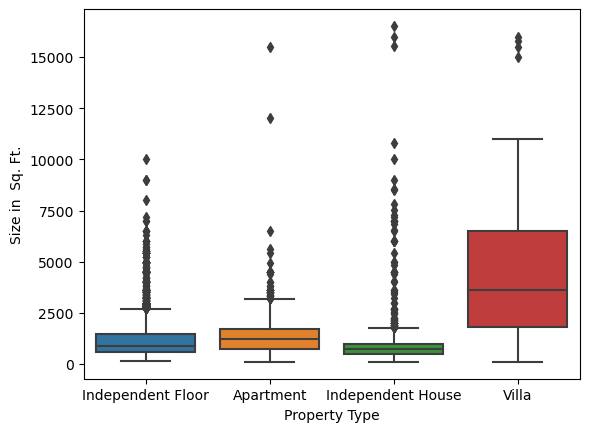

In [5]:
sns.boxplot(data=houses, x='propertyType',y='size_sq_ft')
plt.ylabel("Size in  Sq. Ft.")
plt.xlabel("Property Type")
plt.show()

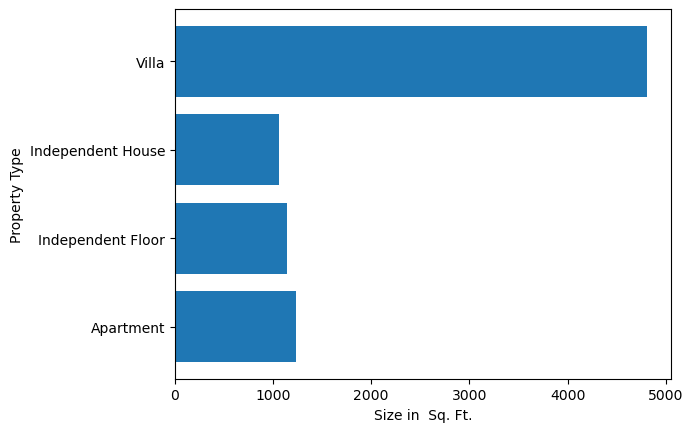

In [6]:
cts = houses.groupby('propertyType')['size_sq_ft'].mean()
plt.barh(cts.index, cts)
plt.xlabel("Size in  Sq. Ft.")
plt.ylabel("Property Type")
plt.show()

**2. Relation between size of property and asking rent**

In [7]:
houses['size_sq_ft'].corr(houses['price'])

0.5707503034633757

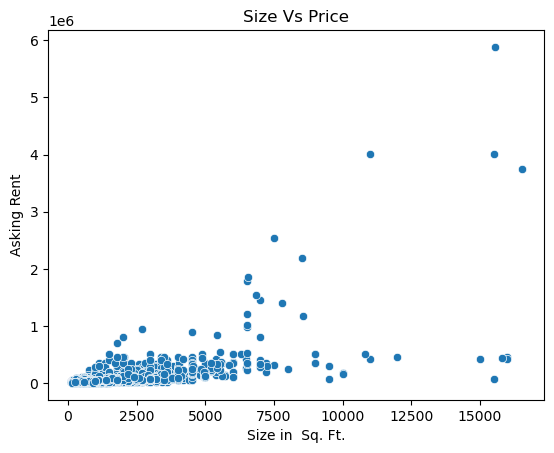

In [8]:
sns.scatterplot(data=houses, x='size_sq_ft',y='price')
plt.xlabel("Size in  Sq. Ft.")
plt.ylabel('Asking Rent')
plt.title("Size Vs Price")
plt.show()

**3. Relation of asking rent with suburb**

In [9]:
s_ols = ols('price ~ suburbName', data=houses).fit()
table = anova_lm(s_ols, typ=2)
print(table)

                  sum_sq       df          F        PR(>F)
suburbName  1.916083e+12     11.0  22.784125  4.640810e-47
Residual    1.366810e+14  17878.0        NaN           NaN


As p-value < 0.05, we can say that size may be related to suburb.

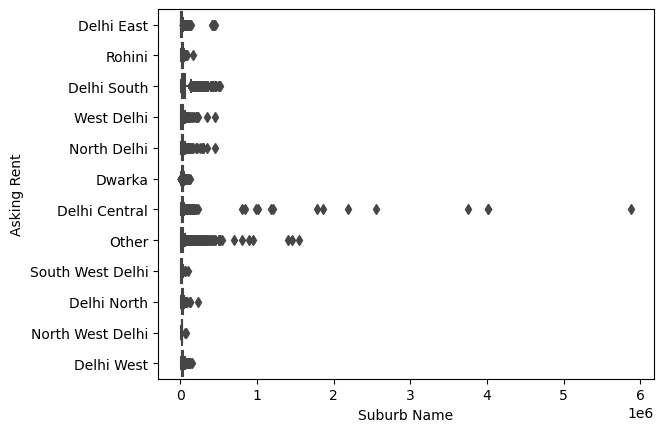

In [10]:
sns.boxplot(data=houses, y='suburbName',
            x='price')
plt.ylabel("Asking Rent")
plt.xlabel("Suburb Name")
plt.show()

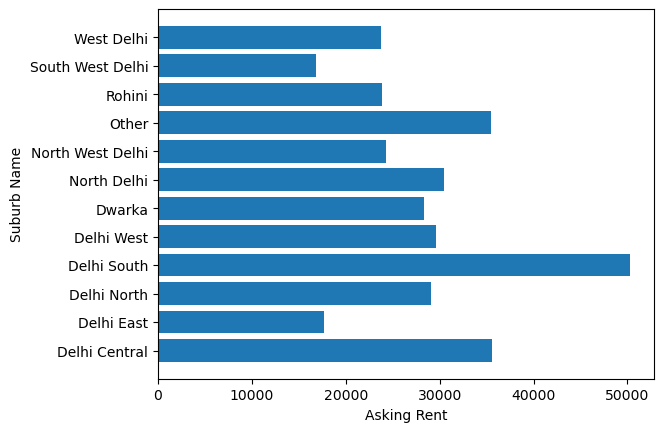

In [11]:
cts = houses.groupby('suburbName')['price'].mean()
plt.barh(cts.index, cts)
plt.xlabel("Asking Rent")
plt.ylabel("Suburb Name")
plt.show()

**4. Relation between suburb and propert type**

In [12]:
ctab = pd.crosstab(index=houses['suburbName'],columns=houses['propertyType'])
print(chi2_contingency(ctab,correction=False))

Chi2ContingencyResult(statistic=4339.816369231951, pvalue=0.0, dof=33, expected_freq=array([[8.74270542e+02, 1.71311213e+03, 1.36829067e+02, 7.78826160e+00],
       [6.18581610e+02, 1.21209581e+03, 9.68120738e+01, 5.51050866e+00],
       [5.63219676e+01, 1.10361543e+02, 8.81475685e+00, 5.01732812e-01],
       [1.19972191e+03, 2.35082627e+03, 1.87764338e+02, 1.06874790e+01],
       [1.00483510e+02, 1.96895025e+02, 1.57263276e+01, 8.95136948e-01],
       [7.79227222e+02, 1.52687703e+03, 1.21954164e+02, 6.94158748e+00],
       [4.00653997e+02, 7.85071884e+02, 6.27049748e+01, 3.56914477e+00],
       [3.52012297e+00, 6.89759642e+00, 5.50922303e-01, 3.13583007e-02],
       [8.65950252e+02, 1.69680872e+03, 1.35526887e+02, 7.71414198e+00],
       [8.76830632e+01, 1.71812856e+02, 1.37229737e+01, 7.81106764e-01],
       [2.75209614e+01, 5.39266629e+01, 4.30721073e+00, 2.45164897e-01],
       [7.11064841e+02, 1.39331448e+03, 1.11286305e+02, 6.33437675e+00]]))


As p-value < 0.05, we can infer that suburb and property type may be related

In [13]:
ctab

propertyType,Apartment,Independent Floor,Independent House,Villa
suburbName,,,,
Delhi Central,598,1915,215,4
Delhi East,600,1208,120,5
Delhi North,22,146,7,1
Delhi South,591,2945,203,10
Delhi West,50,249,15,0
Dwarka,2086,316,31,2
North Delhi,278,926,48,0
North West Delhi,1,10,0,0
Other,880,1633,167,26


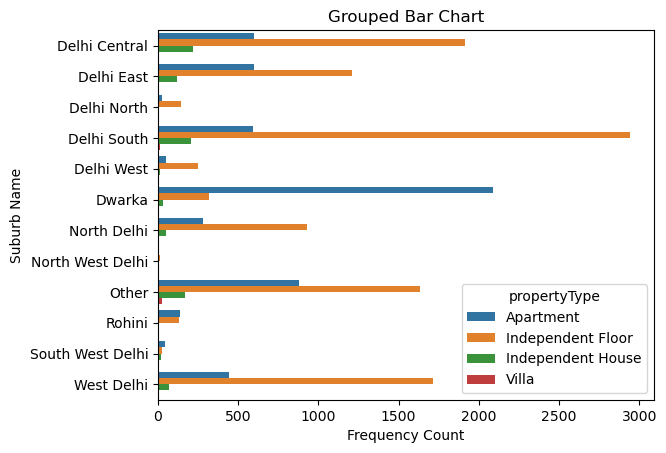

In [14]:
df_bar = pd.melt(ctab.reset_index(),id_vars="suburbName")
sns.barplot(y="suburbName",x="value",hue="propertyType",data=df_bar)
plt.xlabel("Frequency Count")
plt.ylabel("Suburb Name")
plt.title("Grouped Bar Chart")
plt.show()

**5. Relation between distance closest from metro station and asking rent**

In [15]:
houses['closest_mtero_station_km'].corr(houses['price'])

0.0036605575919377246

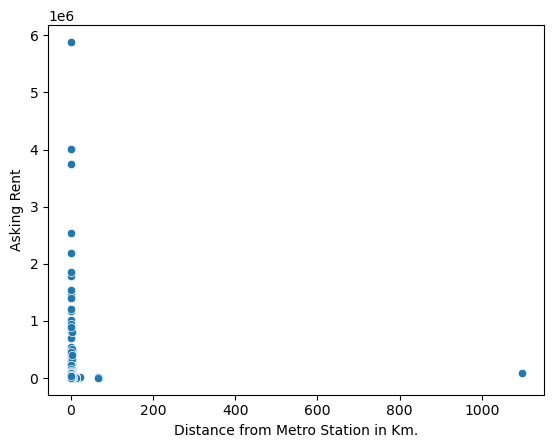

In [16]:
sns.scatterplot(data=houses, x='closest_mtero_station_km',y='price')
plt.xlabel("Distance from Metro Station in Km.")
plt.ylabel("Asking Rent")
plt.show()

**6. Scatter Plot Lat-Long with Property Type**

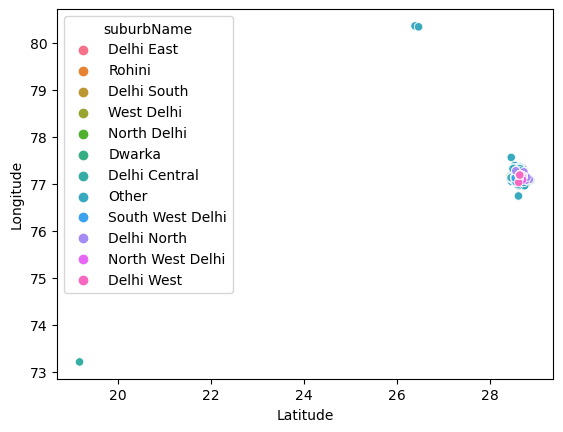

In [17]:
sns.scatterplot(data=houses, x='latitude', y='longitude',hue='suburbName')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [18]:
ss_houses = houses[(houses['latitude']>28) & (houses['longitude']<78) & (houses['longitude']>76)]
ss_houses.shape

(17885, 14)

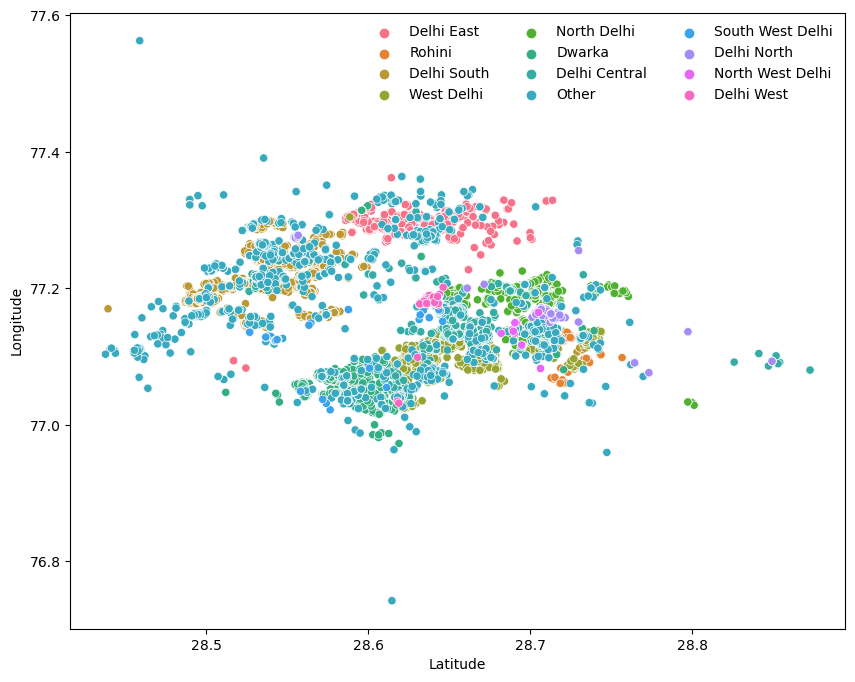

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=ss_houses, x='latitude', y='longitude',hue='suburbName')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend(frameon=False, loc='upper right', ncol=3)
plt.show()